# Customer Segmentation using Clustering

This mini-project is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by Yhat. Please feel free to refer to the post for additional information, and solutions.

<blockquote>
    In this post I'm going to talk about something that's relatively simple but fundamental to just about any business: Customer Segmentation. At the core of customer segmentation is being able to identify different types of customers and then figure out ways to find more of those individuals so you can... you guessed it, get more customers! In this post, I'll detail how you can use K-Means clustering to help with some of the exploratory aspects of customer segmentation.
</blockquote>

This makes no sense. Why do you care about customers? You should care about **offers**, not customers. Which offers work (have more responses)? Which don't.

No two customers are alike. You have no control over customers. You have control over offers. 

"Customer Segmentation" makes no sense.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn

# Setup Seaborn
sns.set_style("whitegrid") # this sometimes needs to be reset :-(
sns.set_context("notebook")

## Data

The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [2]:
df_offers = pd.read_excel("data/WineKMC.xlsx", sheet_name=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [3]:
# This data file only includes offers responded to, so we can create
# a coumn, "responded" for "responded ffers" and set it to 1 for this data set

df_transactions = pd.read_excel("data/WineKMC.xlsx", sheet_name=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['responded'] = 1
df_transactions.head()

,customer_name,offer_id,responded
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similarly minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas <tt><a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html">merge</a></tt> and <tt><a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html">pivot_table</tt> functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [4]:
#your turn
df_merged = pd.merge(df_offers, df_transactions, on='offer_id', how='outer')
df_merged.head()


,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,responded
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1


In [5]:
# If "responded" has no value, the customer did not respond, so fill with 0
df_response = pd.pivot_table(df_merged,columns='offer_id', index='customer_name', values='responded', fill_value=0)
df_response.head()

offer_id,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [6]:
# Change the column labels to something more understandable
df_response.columns = ['offer_' + str(c) for c in df_response.columns]

# And reset the index to numeric
df_response.reset_index(inplace=True)

df_response.head()

,customer_name,offer_1,offer_2,offer_3,offer_4,offer_5,offer_6,offer_7,offer_8,offer_9,...,offer_23,offer_24,offer_25,offer_26,offer_27,offer_28,offer_29,offer_30,offer_31,offer_32
0,Adams,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,Allen,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,Anderson,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,Bailey,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Baker,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
# Check for any `NaN`
# We set the 1 and 0 ourselves; how could there be any NaN here?
print("NaN count: ", df_response.isnull().sum().sum())


NaN count:  0


## K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce three methods: the Elbow method, the Silhouette method, and the gap statistic.

### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
    <li> Create a numpy matrix <tt>x_cols</tt> with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the 
    <tt><a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">KMeans</a></tt> clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

**What values of  𝑆𝑆  do you believe represent better clusterings? Why?** 

Lower SS values represent better clustering. SS is the distance from each data point to the centroid and we want to minimize that distance.

In [8]:
# your turn
# Create a numpy matrix x_cols with only the columns representing the offers (i.e. the 0/1 colums)

x_cols = np.matrix(df_response.drop('customer_name', axis=1))

x_cols

matrix([[0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 1]])

Each row of the matrix represents a single customer. We will be clustering customers (not offers).

In [9]:
# Write code that applies the KMeans clustering method from scikit-learn to this matrix.

from sklearn.cluster import KMeans

SS = []

# For simplicity, test 2 <= K <= 10 
for k in range(2, 11):
    kmeans_cluster = KMeans(n_clusters = k, random_state=42).fit(x_cols)
    SS.append(kmeans_cluster.inertia_)

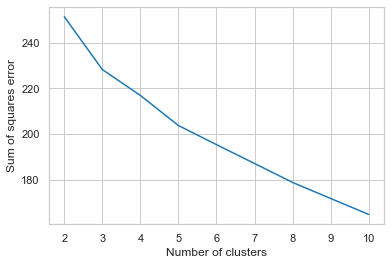

In [10]:
# Construct a plot showing SS for each K. 
plt.plot(range(2,11), SS)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squares error")
plt.show();

**Pick K using this plot**

> Choose the elbow point in the plot as the best value for 𝐾. The elbow point is the point at which the plot starts descending much more slowly.

I think 5 is slightly better than 3.

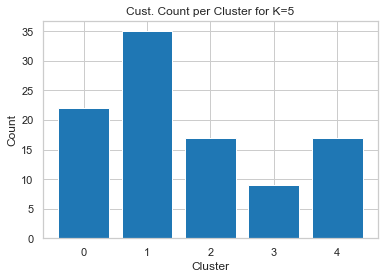

In [11]:
# Make a bar chart showing the number of points in each cluster for k-means under the best 𝐾 .

kmeans_cluster = KMeans(n_clusters=5, random_state=42).fit(x_cols)

counts = [0 for i in range(5)]
for i in range(5):
    for label in kmeans_cluster.labels_:
        if label == i:
            counts[i] += 1

plt.bar(range(5), counts)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Cust. Count per Cluster for K=5")
plt.show();

**What challenges did you experience using the Elbow method to pick K ?**

The plot doesn't have a clear "elbow". 

<hr style="border: 1px solid green;">

### Choosing K: The Silhouette Method

The Silhouette Method measures how well each datapoint, $x_i$, "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

Fortunately, scikit-learn provides a function, [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)  to compute this. Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<blockquote>

`sklearn.metrics.silhouette_score(X, labels, metric=’euclidean’, sample_size=None, random_state=None, **kwds)`
    
Compute the mean Silhouette Coefficient of all samples.
</blockquote>

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the <tt>silhouette_score</tt> function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

For n_clusters = 2 The average silhouette_score is : 0.09365573283492713
For n_clusters = 3 The average silhouette_score is : 0.11889942863638556
For n_clusters = 4 The average silhouette_score is : 0.12347053919571699
For n_clusters = 5 The average silhouette_score is : 0.14092516241984757
For n_clusters = 6 The average silhouette_score is : 0.1371798939109807
For n_clusters = 7 The average silhouette_score is : 0.1161092456616906
For n_clusters = 8 The average silhouette_score is : 0.11339573832632867
For n_clusters = 9 The average silhouette_score is : 0.12505960527779877
For n_clusters = 10 The average silhouette_score is : 0.11928332134753233


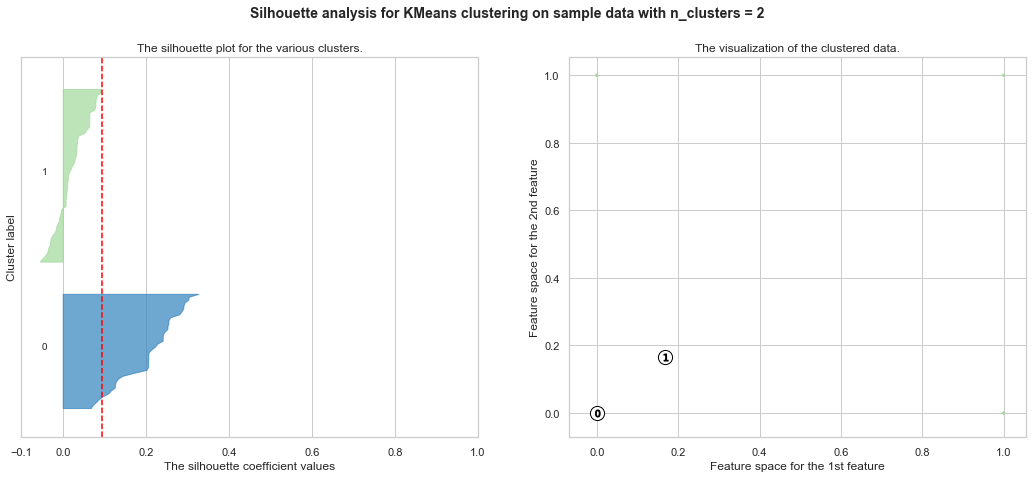

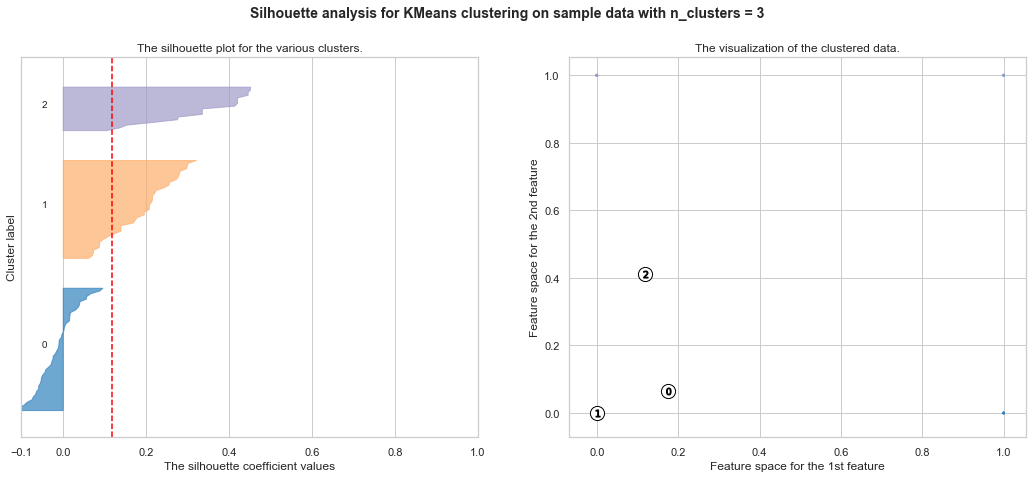

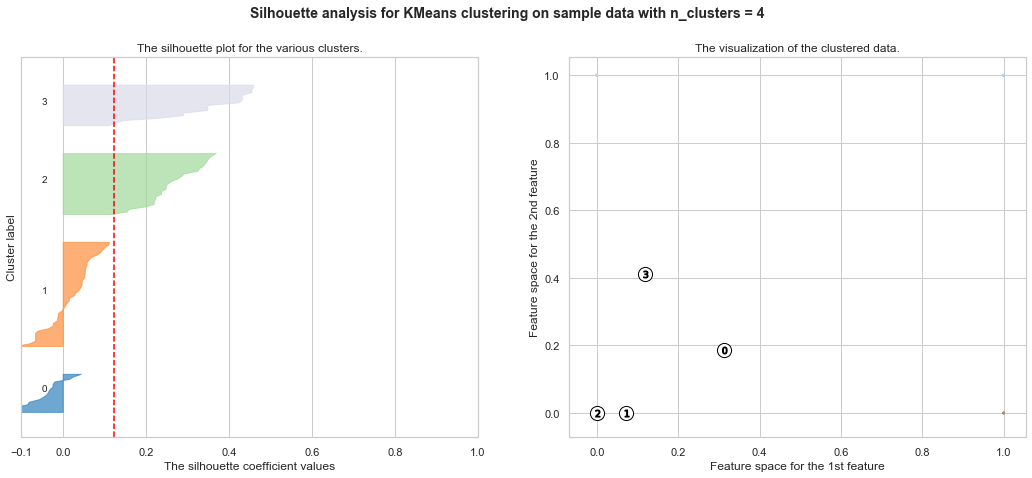

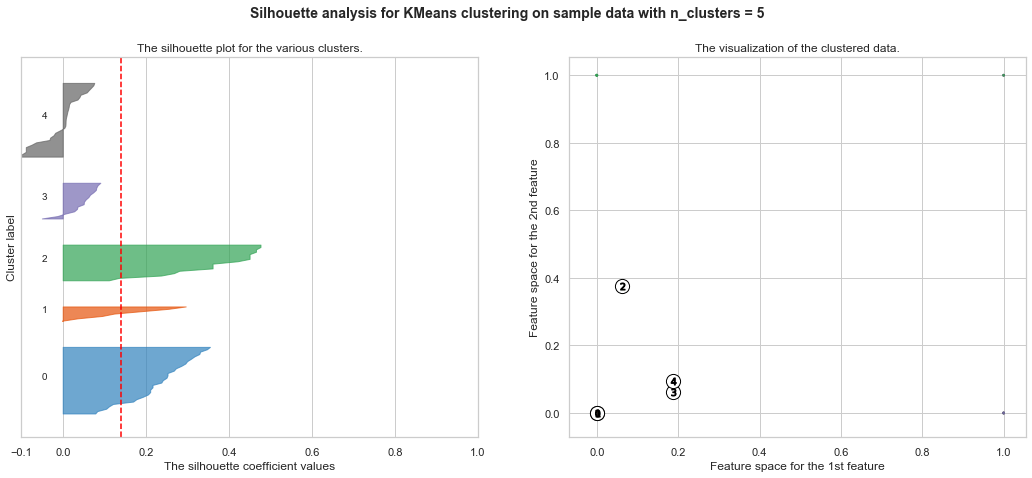

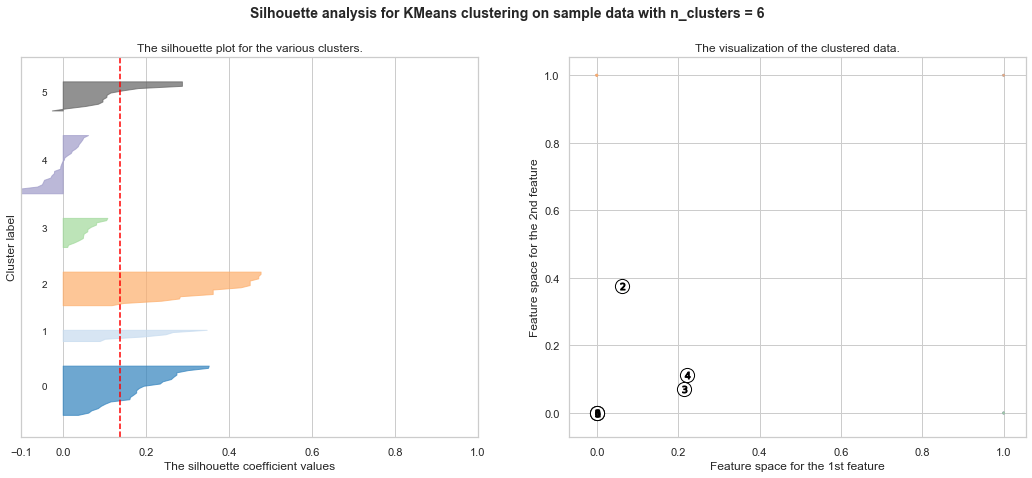

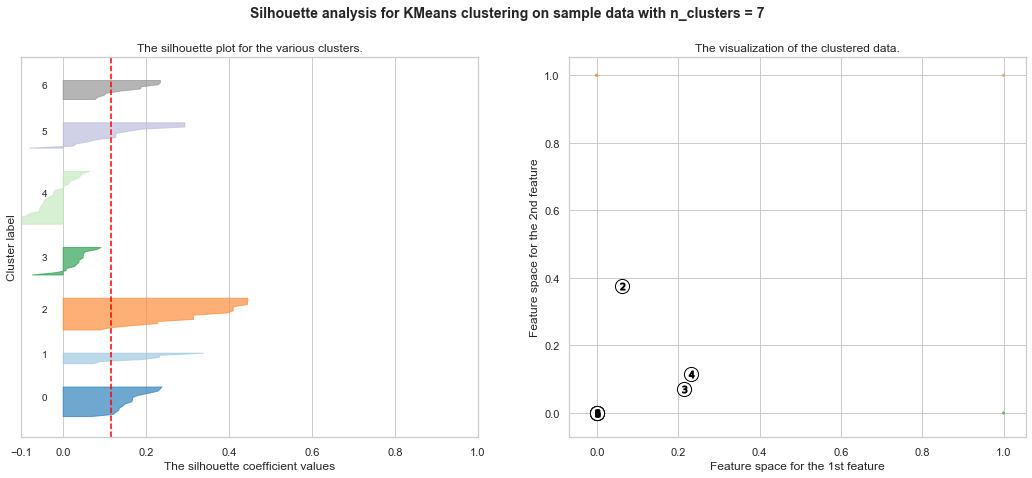

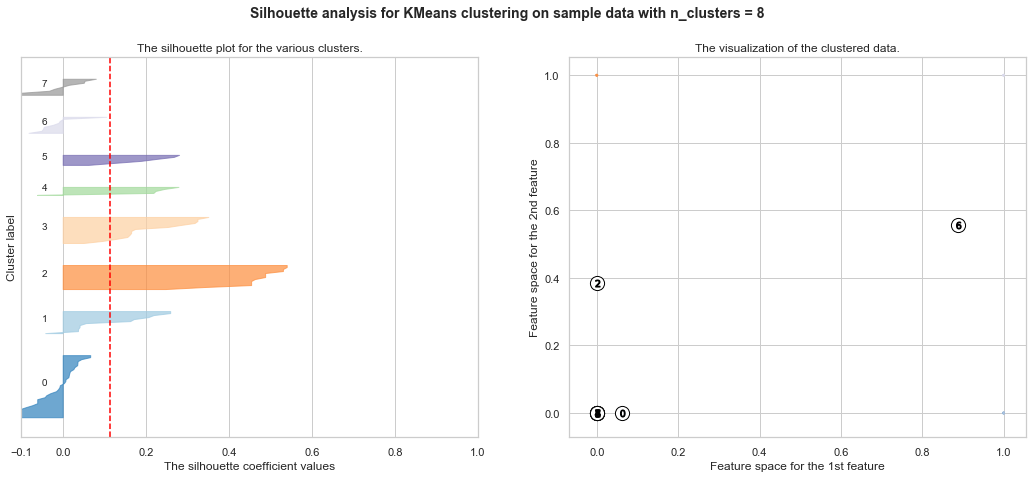

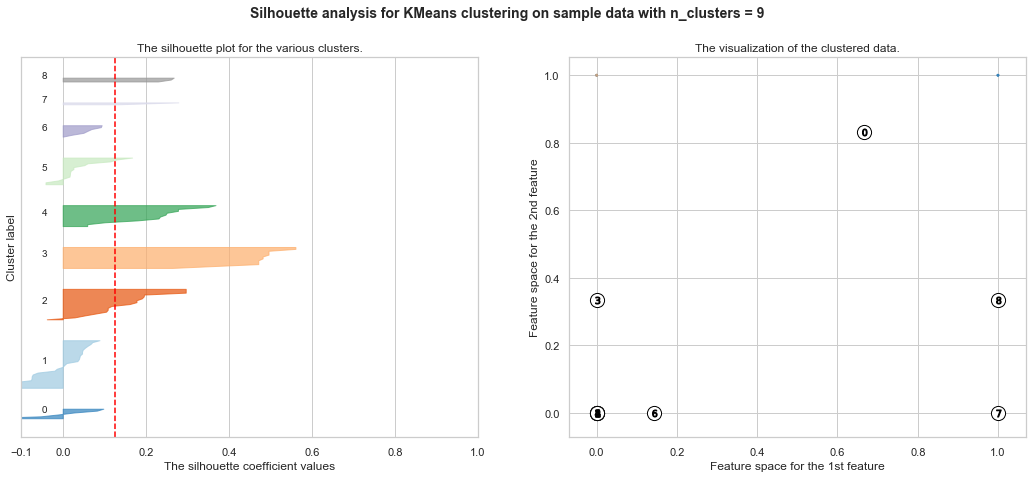

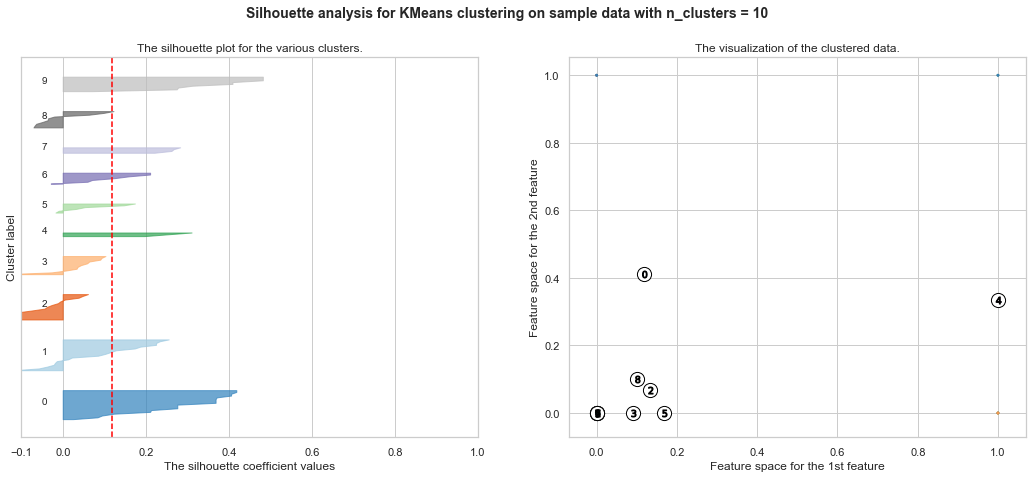

In [12]:
# Your turn.
# Using the documentation for the silhouette_score function above, 
# construct a series of silhouette plots like the ones in the article linked above.

# Code based on the linked article,
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html


#from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# We don't need make_blobs, because we have our data already
# Avoid ValueError:
# https://stackoverflow.com/questions/44224076/...
#  ... python-3-scatter-plot-gives-valueerror-masked-arrays-must-be-1-d-even-though/
X = x_cols
X = np.array(X)

range_n_clusters = [i for i in range(2,11)]


for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    # but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        colors = cm.tab20c(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=colors, edgecolor=colors, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.tab20c(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', 
                s=30, lw=0, alpha=0.7, c=colors
               )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

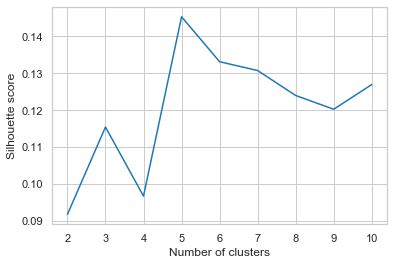

In [13]:
# Compute the average silhouette score for each 𝐾 and plot it. 

scores = []

for k in range(2,11):
    clusters = KMeans(n_clusters = k, random_state = 42).fit(x_cols)
    
    score = silhouette_score(x_cols, clusters.labels_)
    scores.append(score)
    
plt.plot(range(2,11), scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score");

What K does the plot suggest we should choose? Does it differ from what we found using the Elbow method?

> "The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap."  

This indicts that we want the number of clusters with the highest silhouette score; that would be 5.

This is the same number that we found using the Elbow method, but it's much more obvious here.

<hr style="border: 1px solid green;">

### Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the `gap statistic`. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion and compares it to the sum-of-squares of a "null distribution", that is, a random set of points with no clustering. The estimate for the optimal number of clusters, $K$, is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

<hr style="border: 2px solid green;">

## Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). 

Principal Component Analysis (PCA) can help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use PCA to transform our multi-dimensional dataset into a 2 dimensional dataset.

(This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.)

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's <tt><a href="http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html">PCA</a></tt> function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them <tt>x<tt> and <tt>y<tt>)
  </ul>
<li> Plot a scatterplot of the <tt>x</tt> vs <tt>y<tt> columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

In [14]:
#your turn
# Use PCA to plot your clusters

from sklearn.decomposition import PCA

# Create a data frame with the following fields:
  # customer name, cluster id, the two PCA components (x and y)
pca = pd.DataFrame(PCA(n_components=2).fit_transform(x_cols))
pca.columns = ['x','y']
pca['cluster_id'] = pd.Series(KMeans(n_clusters=5).fit(x_cols).labels_)
pca['customer_name'] = df_response.customer_name

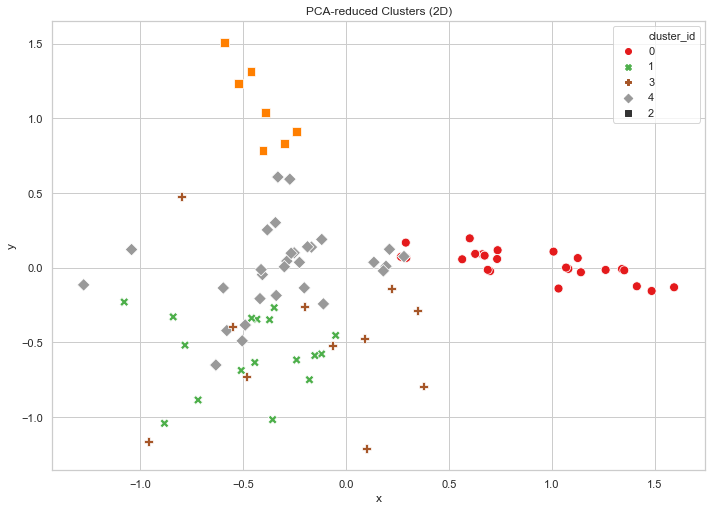

In [15]:
# Plot a scatterplot of the x vs y columns
# Color-code points differently based on cluster ID

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')


sns.scatterplot('x','y', data=pca, style='cluster_id', hue='cluster_id', 
                palette="Set1", alpha=1, s=80)
plt.title('PCA-reduced Clusters (2D)')
plt.show()

We've taken those columns of 0/1 indicator variables and transformed them into a 2-D dataset. We arbitrarily called one column  `x` and called the other `y`. Now we can visualize each point in a scatterplot. We color coded each point based on its cluster so it's easier to see them.

> **How do the clusters look?
Based on what you see, what seems to be the best value for K? Moreover, which method of choosing K seems to have produced the optimal result visually?**

K=5 still looks good. 

I think the silhouette method works best.

Note that this plot changes every time x and y are recomputed.

> **Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in the context of the original data. For example, do the clusters correspond to wine variants or something else interesting?**



In [16]:
# The PCA DataFrame maps customers to clusters
pca

,x,y,cluster_id,customer_name
0,1.007580,0.108215,0,Adams
1,-0.287539,0.044715,4,Allen
2,-0.392032,1.038391,2,Anderson
3,0.699477,-0.022542,0,Bailey
4,0.088183,-0.471695,3,Baker
...,...,...,...,...
95,-0.151666,-0.587844,1,Williams
96,0.688224,-0.013688,0,Wilson
97,-0.551215,-0.395670,3,Wood
98,-0.489805,-0.383307,4,Wright


In [17]:
# Use that mapping to add cluster IDs to the Transactions DataFrame
df_transactions['cluster_id'] =  df_transactions.customer_name.map(pca.set_index('customer_name').cluster_id)

# and merge into offers so we have all of the information we need
df_clustered = df_transactions.merge(df_offers, on="offer_id")

cols = ['offer_id', 'responded', 'cluster_id', 'past_peak']
df_clustered[cols] = df_clustered[cols].astype('category')

df_clustered.sort_values(by="cluster_id", inplace=True)

df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 161 to 194
Data columns (total 10 columns):
customer_name    324 non-null object
offer_id         324 non-null category
responded        324 non-null category
cluster_id       324 non-null category
campaign         324 non-null object
varietal         324 non-null object
min_qty          324 non-null int64
discount         324 non-null int64
origin           324 non-null object
past_peak        324 non-null category
dtypes: category(4), int64(2), object(4)
memory usage: 20.9+ KB


In [18]:
df_clustered.head()

,customer_name,offer_id,responded,cluster_id,campaign,varietal,min_qty,discount,origin,past_peak
161,Stewart,8,1,0,March,Espumante,6,45,South Africa,False
131,Perry,29,1,0,November,Pinot Grigio,6,87,France,False
130,Hughes,29,1,0,November,Pinot Grigio,6,87,France,False
129,Cruz,29,1,0,November,Pinot Grigio,6,87,France,False
128,Bennett,29,1,0,November,Pinot Grigio,6,87,France,False


In [19]:
# Make some plots
cluster_id = df_clustered.cluster_id

<blockquote>
    
`pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)`

Compute a simple cross-tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

</blockquote>

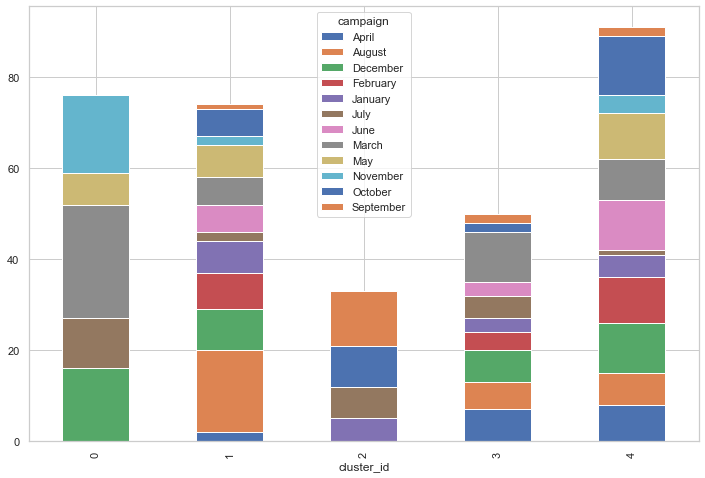

In [20]:
# cluster ID vs Campaign
pd.crosstab(cluster_id, df_clustered.campaign).plot(kind='bar',stacked=True,figsize=(12,8));


<blockquote>
    
`DataFrame.T`

Transpose index and columns.

Reflect the DataFrame over its main diagonal by writing rows as columns and vice-versa. The property T is an accessor to the method transpose().

</blockquote>

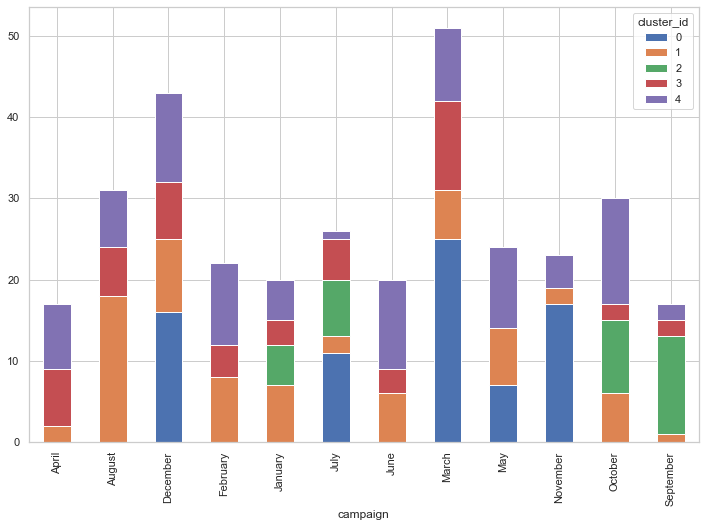

In [21]:
# cluster ID vs Campaign
pd.crosstab(cluster_id, df_clustered.campaign).T.plot(kind='bar',stacked=True,figsize=(12,8));


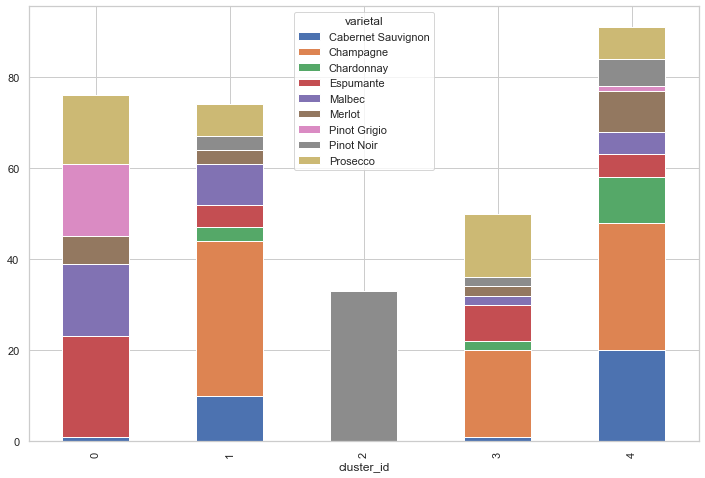

In [22]:
# cluster ID vs Varietal
pd.crosstab(cluster_id, df_clustered.varietal).plot(kind='bar',stacked=True,figsize=(12,8));


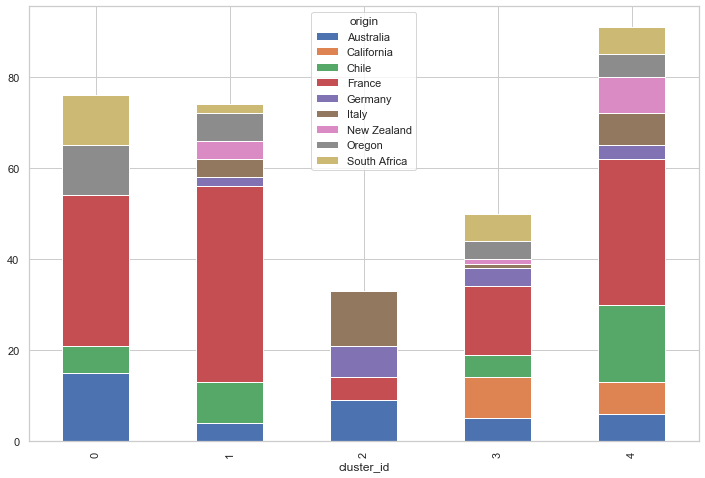

In [23]:
# cluster ID vs Origin
pd.crosstab(cluster_id, df_clustered.origin).plot(kind='bar',stacked=True,figsize=(12,8));


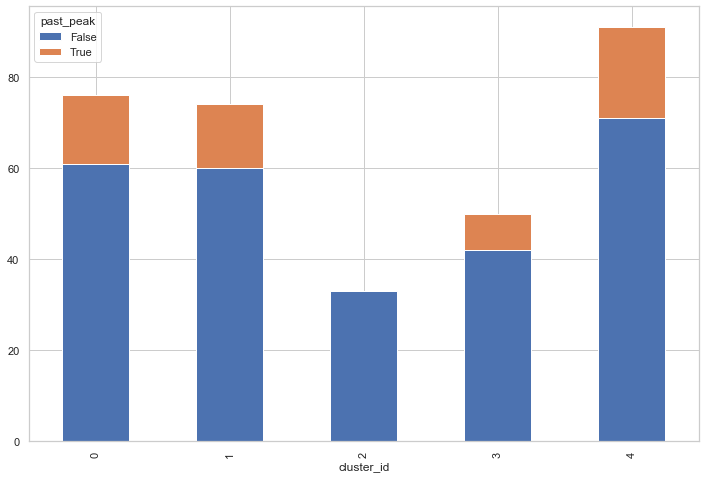

In [24]:
# cluster ID vs "Past Peak" (True or False)
pd.crosstab(cluster_id, df_clustered.past_peak).plot(kind='bar',stacked=True,figsize=(12,8));


Most customers purchase peak (not past-peak) wines from France. Customers in cluster 1 never buy past-peak wines.

People in cluster 1 mostly buy in March; only cluster 4 also buys in March.

Clusters 0 and 1 purchase Australian wines more than other clusters. Only cluster 1 purchases more wines from an origin that isn't French.

Cluster 0 prefers Espumante. Cluster 1 really likes Pinot Noir (much more than anything else). Culsters 2 and 3 buy a lot of champagne and Cabernet Sauvignon. Cluster 4 only purchases three varietals; they prefer champagne.


<hr style="border: 2px solid green;">

<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, we restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using the new PCA object shown in the next cell, plot the <tt>explained_variance_</tt> field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

<blockquote>

`sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, svd_solver=’auto’, tol=0.0, iterated_power=’auto’, random_state=None)`

Principal component analysis (PCA)

   * `n_components` : int, float, None or string
     Number of components to keep. if `n_components` is not set all components are kept
     
 ...
 
   * `explained_variance_` : array, shape (n_components,)
      The amount of variance explained by each of the selected components.
      Equal to `n_components` largest eigenvalues of the covariance matrix of `X`.
      
-------

`fit(self, X, y=None)`

Fit the model with X.

Parameters:	
   * `X` : array-like, shape (n_samples, n_features)
     Training data, where n_samples is the number of samples and n_features is the number of features.
   
</blockquote>

In [25]:
#your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition
pca2 = sklearn.decomposition.PCA()
pca2.fit(x_cols)

# Do the rest on your own :)

print(pca2.explained_variance_)

[0.4096489  0.30753551 0.2022926  0.16703717 0.15015248 0.1434373
 0.13818887 0.12192294 0.11636172 0.10804271 0.09937813 0.09495961
 0.08690352 0.07256738 0.0660996  0.06245473 0.05634388 0.05327395
 0.04728801 0.04393911 0.03900424 0.03625783 0.03455714 0.03235091
 0.02940632 0.02618221 0.02308167 0.02142632 0.018814   0.0165252
 0.01426187 0.0077789 ]


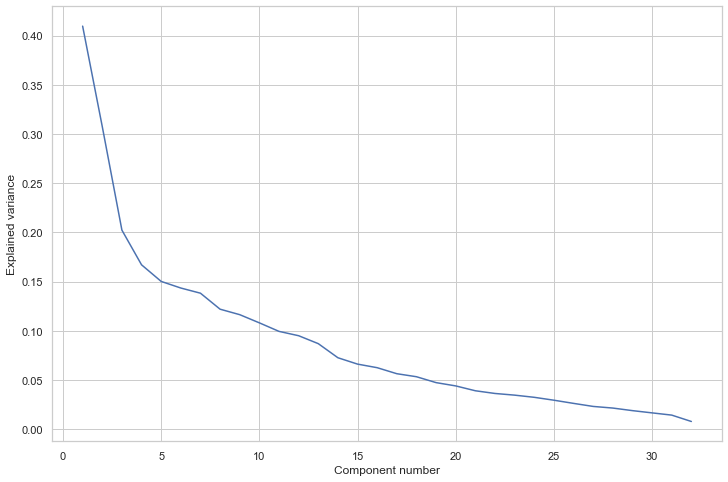

In [26]:
# plot the explained_variance_
# There are len(pca.explained_variance_) items
plt.figure(figsize=(12,8))
plt.plot(range(1, len(pca2.explained_variance_) + 1), pca2.explained_variance_)

plt.xlabel("Component number")
plt.ylabel("Explained variance")

plt.show();

**Look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?**

5

## Other Clustering Algorithms

k-means is only one of many clustering algorithms. Below is a brief description of several clustering algorithms. The table provides references to other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance. AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known _a priori_.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of _divisive_ hierarchical clustering. That is, all observations are part of the same cluster at first and, at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed; there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendrogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is another version of hierarchical clustering. Unlike divisive clustering, every observation starts in its own cluster and, at each iteration or level of the hierarchy, observations are merged into fewer and fewer clusters until convergence. As with divisive hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendrogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters _a priori_, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</td>
<td>number of clusters</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>'Mahalanobis distances' to centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story about why you think it performs the best.</p>
</div>


In [27]:
# From before:
# pca = pd.DataFrame(PCA(n_components=2).fit_transform(x_cols))
# pca.columns = ['x','y']


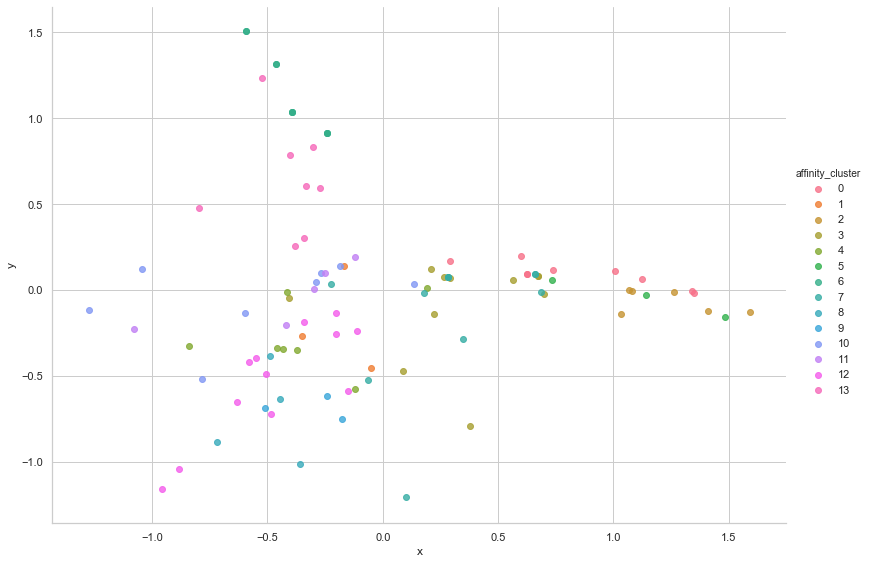

In [28]:
# Affinity propagation
from sklearn.cluster import AffinityPropagation

pca['affinity_cluster'] = AffinityPropagation().fit(x_cols).labels_

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')

sns.lmplot(x='x', y='y', hue='affinity_cluster', data=pca, 
           fit_reg=False, height=8, aspect=1.4
          )
plt.show()

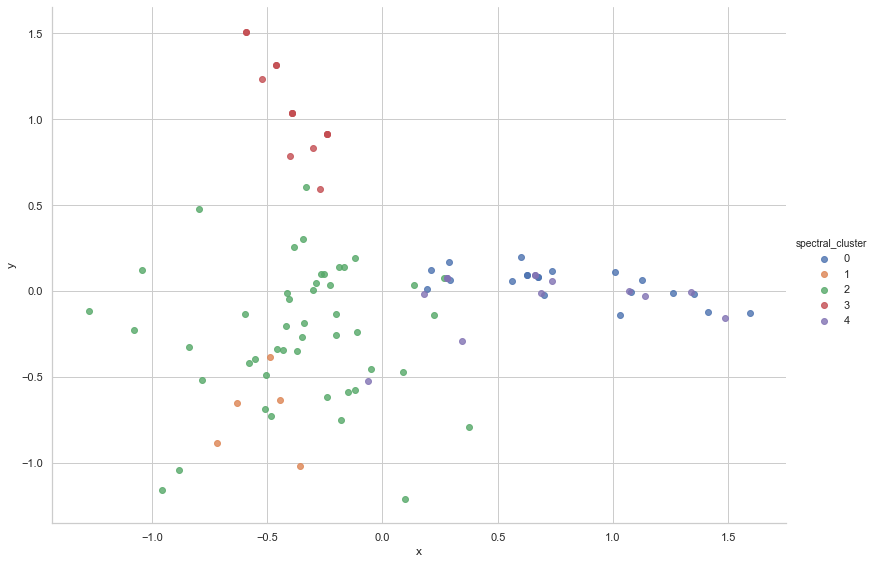

In [29]:
# Spectral clustering
from sklearn.cluster import SpectralClustering

pca['spectral_cluster'] = SpectralClustering(n_clusters=5).fit(x_cols).labels_

sns.lmplot(x='x', y='y', hue='spectral_cluster', data=pca, 
           fit_reg=False, height=8, aspect=1.4
          )
plt.show()

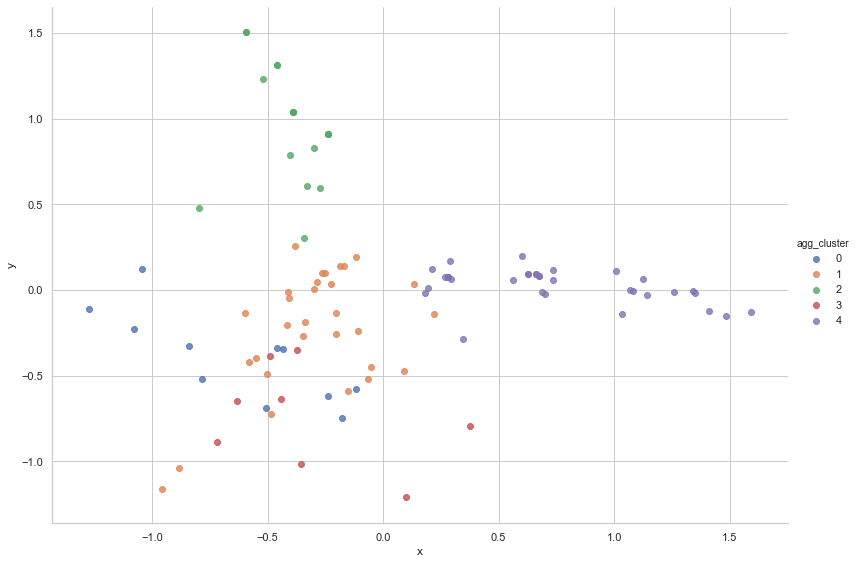

In [30]:
# Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

pca['agg_cluster'] = AgglomerativeClustering(n_clusters=5).fit(x_cols).labels_

sns.lmplot(x='x', y='y', hue='agg_cluster', data=pca, 
           fit_reg=False, height=8, aspect=1.4
          )
plt.show()

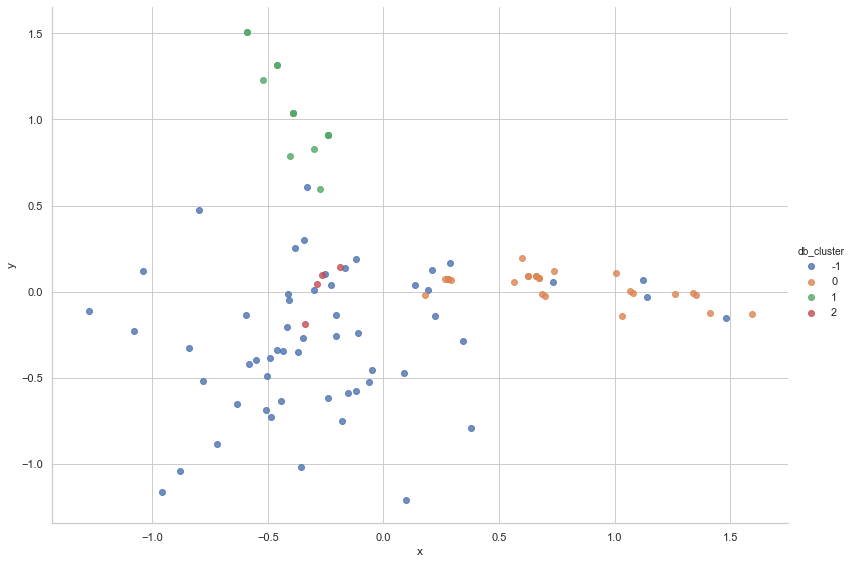

In [31]:
# DBSCAN
from sklearn.cluster import DBSCAN

pca['db_cluster'] = DBSCAN(min_samples=4, eps = 1.2).fit(x_cols).labels_

sns.lmplot(x='x', y='y', hue='db_cluster',  data=pca, 
           fit_reg=False, height=8, aspect=1.4
          )
plt.show()

**How do their results compare? Which performs the best? Tell a story about why you think it performs the best.**

`Affinity Clustering` does not require K to be known beforehand. It chose 13 clusters. They all look muddled together to me.

`Spectral clustering`, `Agglomerative Clustering`, and `DBSCAN` have very similar results, with `Agglomerative Clustering` perhaps performing a bit better.

The options to `DBSCAN` are confusing, e.g. `eps` "is the most important `DBSCAN` parameter to choose appropriately for your data set and distance function". Between `eps=1.4` and `eps=1.5`, with `min_samples=5`,  the number of clusters drops from 5 to 2. `min_samples=4` is a bit better. This is a very fiddly algorithm.
